In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
file_path = "/Users/harshjaiswal/Desktop/CDI :. CDD/Projects /Data & Resources-2/Data/Prediction data.xlsx"

In [3]:
sheet_name = 'Stayed Churned'

In [4]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [5]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11392-JAM,Female,39,Yes,Jammu & Kashmir,11,1,Deal 2,Yes,No,...,Bank Withdrawal,84.40,4484.05,0.0,0,1655.64,6139.69,Stayed,Others,Others
1,11392-KAR,Female,28,Yes,Karnataka,9,32,Deal 1,Yes,Yes,...,Bank Withdrawal,112.55,7806.50,0.0,0,235.29,8041.79,Stayed,Others,Others
2,11410-AND,Male,80,No,Andhra Pradesh,1,4,None,Yes,Yes,...,Credit Card,101.55,5070.40,0.0,0,1217.16,6287.56,Stayed,Others,Others
3,11450-HAR,Male,60,Yes,Haryana,5,18,None,Yes,No,...,Credit Card,75.55,4707.85,0.0,0,398.79,5106.64,Stayed,Others,Others
4,11464-WES,Male,25,No,West Bengal,12,5,None,Yes,Yes,...,Credit Card,99.85,1992.55,0.0,0,522.06,2514.61,Stayed,Others,Others


In [6]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   6007 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [8]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [9]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [10]:
label_encoders = {}

In [11]:
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [12]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [13]:
X = data.drop('Customer_Status', axis=1)

In [14]:
y = data['Customer_Status']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)

In [17]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[791  52]
 [133 226]]


In [20]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.86      0.94      0.90       843
           1       0.81      0.63      0.71       359

    accuracy                           0.85      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



In [21]:
importances = rf_model.feature_importances_

In [22]:
indices = np.argsort(importances)[::-1]

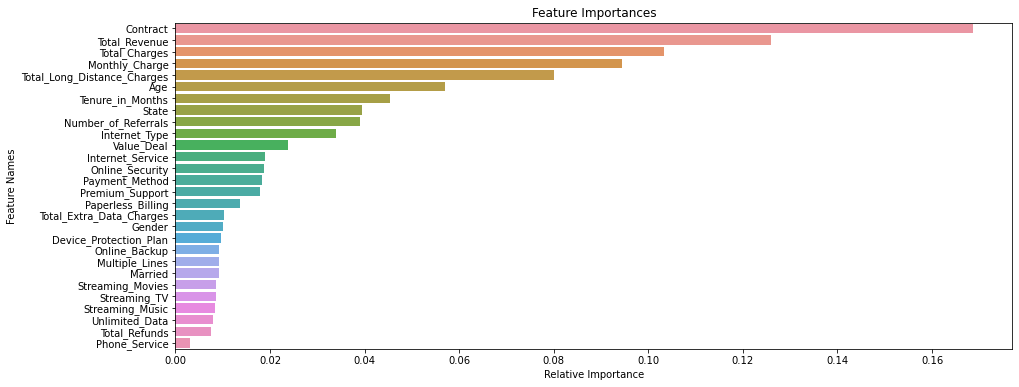

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


Predicting it on new Data

In [24]:
file_path = "/Users/harshjaiswal/Desktop/CDI :. CDD/Projects /Data & Resources-2/Data/Prediction data.xlsx"

In [25]:
sheet_name = 'Joined'

In [26]:
New_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [27]:
New_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.65,19.65,0.0,0,23.67,43.32,Joined,Others,Others
1,15591-KAR,Female,26,No,Karnataka,3,31,None,Yes,No,...,Credit Card,20.40,20.40,0.0,0,45.91,66.31,Joined,Others,Others
2,16032-AND,Female,47,No,Andhra Pradesh,8,18,None,Yes,No,...,Bank Withdrawal,46.60,87.90,0.0,0,3.74,91.64,Joined,Others,Others
3,16068-BIH,Female,44,Yes,Bihar,4,25,Deal 5,No,No,...,Bank Withdrawal,25.25,25.25,0.0,10,0.00,35.25,Joined,Others,Others
4,19539-PUN,Female,37,Yes,Punjab,14,8,Deal 5,Yes,No,...,Credit Card,45.40,45.40,0.0,0,49.33,94.73,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,95748-UTT,Male,22,Yes,Uttar Pradesh,5,4,Deal 5,Yes,Yes,...,Mailed Check,25.40,25.40,0.0,0,32.73,58.13,Joined,Others,Others
407,96430-PUN,Male,37,No,Punjab,0,23,None,Yes,No,...,Credit Card,48.75,48.75,0.0,0,26.26,75.01,Joined,Others,Others
408,98301-WES,Male,28,Yes,West Bengal,4,27,None,Yes,No,...,Bank Withdrawal,53.45,119.50,0.0,0,25.18,144.68,Joined,Others,Others
409,98334-MAD,Male,67,Yes,Madhya Pradesh,15,20,None,Yes,No,...,Bank Withdrawal,20.20,65.95,0.0,0,95.43,161.38,Joined,Others,Others


In [28]:
original_data = New_data.copy()

In [29]:
customer_ids = New_data['Customer_ID']

In [30]:
new_data = New_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [31]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [32]:
new_data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,41,1,6,1,3,4,1,0,0,...,0,0,0,1,19.65,19.65,0.0,0,23.67,43.32
1,0,26,0,9,3,31,5,1,0,0,...,0,0,0,1,20.40,20.40,0.0,0,45.91,66.31
2,0,47,0,0,8,18,5,1,0,1,...,1,0,1,0,46.60,87.90,0.0,0,3.74,91.64
3,0,44,1,2,4,25,4,0,0,1,...,0,0,0,0,25.25,25.25,0.0,10,0.00,35.25
4,0,37,1,15,14,8,4,1,0,1,...,1,0,1,1,45.40,45.40,0.0,0,49.33,94.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1,22,1,19,5,4,4,1,1,0,...,0,0,0,2,25.40,25.40,0.0,0,32.73,58.13
407,1,37,0,15,0,23,5,1,0,1,...,1,0,1,1,48.75,48.75,0.0,0,26.26,75.01
408,1,28,1,21,4,27,5,1,0,1,...,1,0,0,0,53.45,119.50,0.0,0,25.18,144.68
409,1,67,1,11,15,20,5,1,0,0,...,0,0,0,0,20.20,65.95,0.0,0,95.43,161.38


In [33]:
new_predictions = rf_model.predict(new_data)

In [34]:
original_data['Customer_Status_Predicted'] = new_predictions

In [35]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [37]:
original_data.to_csv(r"/Users/harshjaiswal/Desktop/CDI :. CDD/Projects /Data & Resources-2/Data/predicted_value.csv", index=False)